# Final Project-Applied Data Science-Jingyi Yan

## Contents:
1. Introduction

2. Exploatry Data Analysis

3. Model Fitting

4. Performance Measurement

5. Hyperparameter Tunning

## 1. Introduction:

##### Data source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

##### File Description:
- winequalityN.csv

##### Data Field Description:

1 - fixed acidity: Acidity is a fundamental property of wine, imparting sourness and resistance to microbial infection. 

2 - volatile acidity: Volatile acidity refers to the steam distillable acids present in wine, primarily acetic acid but also lactic, formic, butyric, and propionic acids.

3 - citric acid: Citric acid is a weak organic acid that has the chemical formula C ₆H ₈O ₇.

4 - residual sugar: Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. It's measured in grams per liter.

5 - chlorides: The chloride ion is the anion Cl⁻. It is formed when the element chlorine gains an electron or when a compound such as hydrogen chloride is dissolved in water or other polar solvents.

6 - free sulfur dioxide: Free sulfur dioxide is a measure of the amount of SO2 that is not bound to other molecules, and is used to calculate molecular SO2.

7 - total sulfur dioxide: Sulfur Dioxide is used throughout all stages of the winemaking process to prevent oxidation and microbial growth.

8 - density: This can be represented as a comparison of the weight of a specific volume of wine to an equivalent volume of water. It is generally used as a measure of the conversion of sugar to alcohol.

9 - pH: pH is a scale used to specify how acidic or basic a water-based solution is.

10 - sulphates: The term sulfites is an inclusive term for sulfur dioxide (SO2), a preservative that's widely used in winemaking (and most food industries) for its antioxidant and antibacterial properties. 

11 - alcohol: It's usually measured in % vol or alcohol by volume (ABV).

Output variable (based on sensory data):

12 - quality (score between 0 and 10): Wine experts graded the wine quality between 0 (very bad) and 10 (very excellent). The eventual quality score is the median of at least three evaluations made by the same wine experts.

### Objective of this project:

This project is aimed to look into the elements or factors that influence the WINE QUALITY by using the multiple classification model like Logistic Regression. In this project, I will fit the Logisitic Regression to make predictions. Using Confusion Martix, Accuracy rate, Error Rate, ROC/AUC as my performance metric analysis of different models. Also, use the hyperparameter tunning like Grid-Search and Random-Search to optimze the model performance. 

Use Pipeline in the "model" file to realize automation workflow.

## 2. Explotary Data Analysis

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Import Data Into Notebook

In [433]:
from subprocess import check_output

print(check_output(["ls", "../data/raw"]).decode("utf8"))

winequalityN.csv



In [434]:
df = pd.read_csv('../data/raw/winequalityN.csv')

### First Look at the Data

In [435]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Check the missing value in the dataset

In [437]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


### Filling the Missing Value

In [438]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

In [439]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [440]:
fill_list = (null_cell(df)).index

In [441]:
df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

### Correlation Matrix

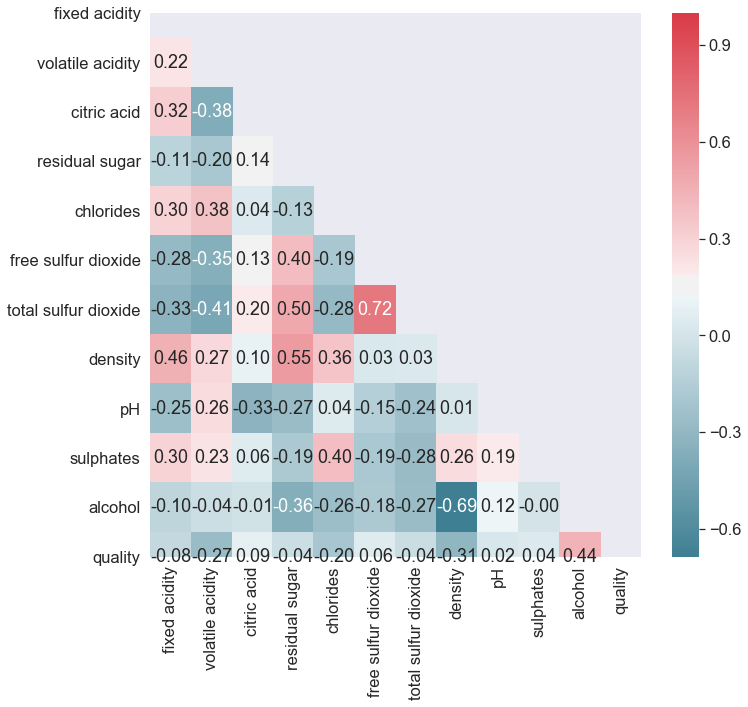

In [442]:
corr_matrix = df_mean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]
corr_list
plt.figure(figsize=(11,10))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

Wine quality has highest correlation with the alcohol. Other relation degree like critic acid, free sulfur dioxide, PH, sulphates has positive corelation with winequality. The wine quality has negative corelation with fixed acidity, volatile acidity, residual sugar, chlorides, total sulfur dioxide, density

 ### Distribution  of Variables

In [443]:
from scipy.stats import norm 

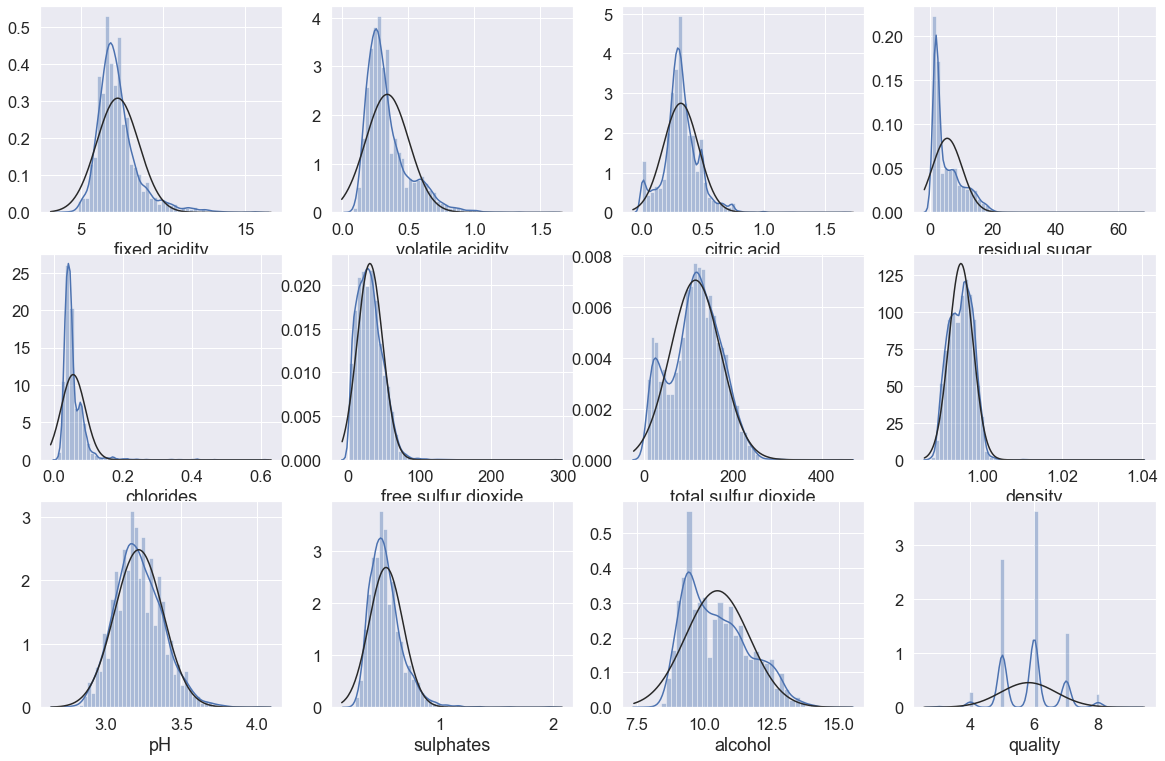

In [444]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)
    

In [445]:
df_mean

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


I used to seperate the bin with 2 parts. But the accuracy rate is only 0.73. When I seperate the bin with 3 parts, the accuracy rate is getting higher.

In [446]:
df_bins= df_mean.copy()
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0, 'medium'=1,'high'=2
df_bins['quality_range']= pd.cut(x=df_bins['quality'], bins=bins, labels=labels)

print(df_bins[['quality_range','quality']].head(15))

df_bins = df_bins.drop('quality', axis=1) 

   quality_range  quality
0              1        6
1              1        6
2              1        6
3              1        6
4              1        6
5              1        6
6              1        6
7              1        6
8              1        6
9              1        6
10             1        5
11             1        5
12             1        5
13             1        7
14             1        5


In [447]:
df_bins

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1


In [448]:
df_bins

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1


 ### Quality in Different Wine Types

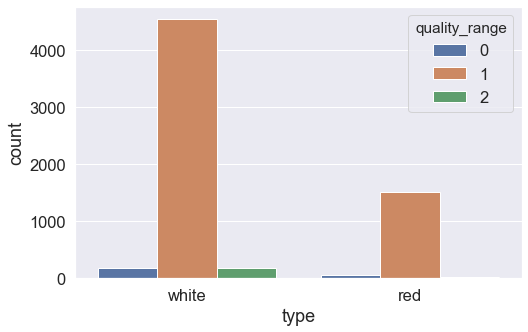

In [449]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'quality_range', data = df_bins)
plt.show()
# 'low'=0, 'medium'=1, 'high'= 2

From the graph above, we can conclude that quality range 1 contains large number of sample.

### Quality & Volatile Acidity by Types

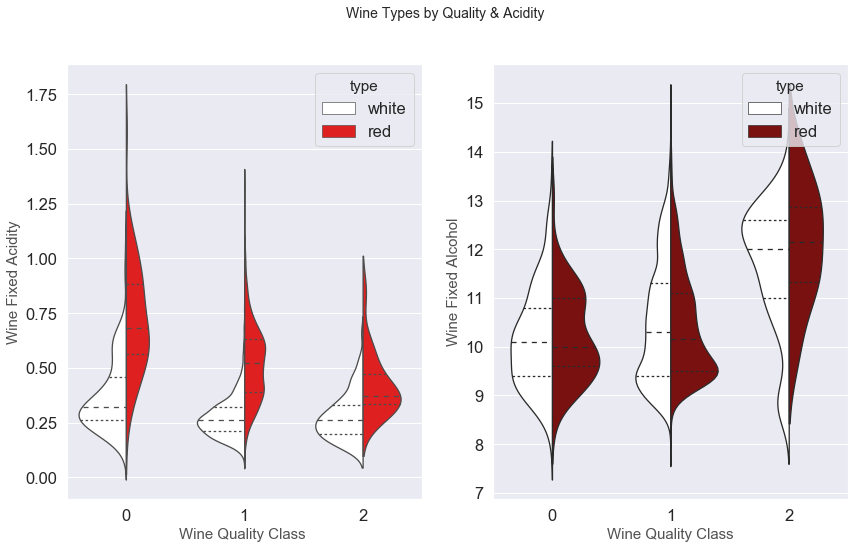

In [451]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
f.suptitle('Wine Types by Quality & Acidity', fontsize=14)

sns.violinplot(x='quality_range', y='volatile acidity', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'red', 'white': 'white'}, ax=ax1)
ax1.set_xlabel("Wine Quality Class ",size = 15,alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity",size = 15,alpha=0.8)

sns.violinplot(x='quality_range', y='alcohol', hue='type', data=df_bins, split=True, inner='quart', linewidth=1.3,
               palette={'red': 'darkred', 'white': 'white'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 15,alpha=0.8)
ax2.set_ylabel("Wine Fixed Alcohol",size = 15,alpha=0.8)
plt.show()

From the violin plot above in the left side, we can conclude that the both the white wine and red wine has fixed acidity. But from violin plot we can know that the white wine has overall lower fixed acidity than red wine. When the quality range is higher, the fixed acidity is distribute more concentrated. 

From the violin plot above in the right side, we can find that the distribution of fixed alchol has no apparent difference in red and white wine. When the quality range is higher, the fixed alcohol will become higher.

## 3. Model Fitting

Change the type from "white" and "red" to 0 and 1.

In [430]:
df_bins.type = df_bins.type.map({'white':0, 'red':1})

Fit the data with logisitic regression model and the accuracy is 0.93.

In [350]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [351]:
X = df_bins[['type', 'alcohol', 'density', 'volatile acidity', 'chlorides',
       'citric acid', 'fixed acidity', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'residual sugar', 'pH']] 
y = df_bins.quality_range
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [352]:
lr1 = LogisticRegression(random_state=40)
lr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [353]:
train_accuracy = lr1.score(X_train, y_train)
test_accuracy = lr1.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.93
Accuracy in Test  Group   : 0.93


####  Confusion Matrix

In [354]:
pred_test  = lr1.predict(X_test)
pred_train = lr1.predict(X_train)

In [355]:
from sklearn.metrics import confusion_matrix 


cm = confusion_matrix(y_test,pred_test)
cm

array([[   1,   44,    0],
       [   0, 1211,    0],
       [   0,   44,    0]])

## 4. Performance Measurement

In [382]:
quality_pred = LogisticRegression(random_state=40)
quality_pred.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Accuracy:

In [383]:
from sklearn.metrics import accuracy_score

print("Accuracy Score of Test Model : ",  quality_pred.score(X_test, y_test))

Accuracy Score of Test Model :  0.9323076923076923


#### Error Rate:

In [385]:
Error_Rate = 1 - (accuracy_score(y_test, pred_test))
Error_Rate

0.06769230769230772

#### ROC/AUC:

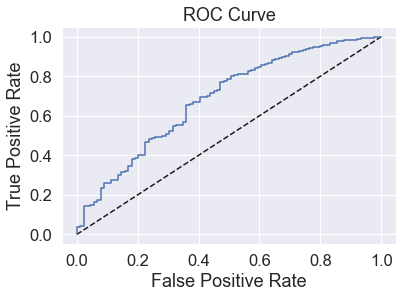

In [386]:
probs = quality_pred.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, probs, pos_label=1)


# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

##  5. HyperParameter Tuning

#### Grid Search

In [356]:
logreg = lr1
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': 40, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [357]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [358]:
from sklearn.model_selection import GridSearchCV


grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parameters,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=40, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [359]:
print("The Best Parametre : ", grid_cv.best_params_)
print("The Best Score     : ", grid_cv.best_score_)
print("All Precisions Values: ", grid_cv.cv_results_['mean_test_score'])

The Best Parametre :  {'C': 10, 'penalty': 'l1'}
The Best Score     :  0.9321225180852701
All Precisions Values:  [0.93166077 0.93166077 0.93166077 0.93166077 0.93166077 0.93166077
 0.93166077 0.93166077 0.93166077 0.93166077 0.93181468 0.93166077
 0.93212252 0.93212252 0.93212252 0.9319686  0.9319686  0.93181468
 0.9319686  0.9319686 ]
